In [1]:
import os
from PIL import Image
import shutil
import kagglehub

# Download latest version
directory = kagglehub.dataset_download("shivamardeshna/real-and-fake-images-dataset-for-image-forensics")

print("Path to dataset files:", directory)

real = 0
fake = 0
dimension_dict = {}
extensions = set()

for i in ['real', 'fake']:
    for j in ['train', 'test', 'validation']:
        if not os.path.exists(os.path.join(directory, f'{i}_{j}')):
            os.mkdir(os.path.join(directory, f'{i}_{j}'))

for root, dirs, files in os.walk(directory):
    up_two = root.split(os.sep)[-1] + '_' + root.split(os.sep)[-2]
    if len(root.split(os.sep)) == 13:
        if root.split(os.sep)[-1] == 'real':
            parent_dir_name = root.split(os.sep)[-2]
            for filename in files:
                extensions.add(filename.split('.')[-1])
                with Image.open(os.path.join(root, filename)) as img:
                    width, height = img.size
                    if f'{width}x{height}' not in dimension_dict:
                        dimension_dict[f'{width}x{height}'] = 1
                    else:
                        dimension_dict[f'{width}x{height}'] += 1
                if not filename.startswith('real_'):
                    old_path = os.path.join(root, filename)
                    new_name = 'real_' + filename
                    new_path = os.path.join(directory, up_two, new_name)
                    shutil.move(old_path, new_path)
                    real += 1
                else:
                    old_path = os.path.join(root, filename)
                    new_path = os.path.join(directory, up_two, filename)
                    shutil.move(old_path, new_path)
                    real += 1

        if root.split(os.sep)[-1] == 'fake':
            parent_dir_name = root.split(os.sep)[-2]
            for filename in files:
                extensions.add(filename.split('.')[-1])
                with Image.open(os.path.join(root, filename)) as img:
                    width, height = img.size
                    if f'{width}x{height}' not in dimension_dict:
                        dimension_dict[f'{width}x{height}'] = 1
                    else:
                        dimension_dict[f'{width}x{height}'] += 1
                if not filename.startswith('fake_'):
                    old_path = os.path.join(root, filename)
                    new_name = 'fake_' + filename
                    new_path = os.path.join(directory, up_two, new_name)
                    shutil.move(old_path, new_path)
                    fake += 1
                else:
                    old_path = os.path.join(root, filename)
                    new_path = os.path.join(directory, up_two, filename)
                    shutil.move(old_path, new_path)
                    fake += 1

print(f'#real: {real} || # fake: {fake} || {dimension_dict} || {extensions}')
dimension_dict.clear()

100%|██████████| 2.76G/2.76G [00:40<00:00, 74.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/shivamardeshna/real-and-fake-images-dataset-for-image-forensics/versions/1
#real: 115201 || # fake: 115134 || {'256x256': 230335} || {'jpg'}


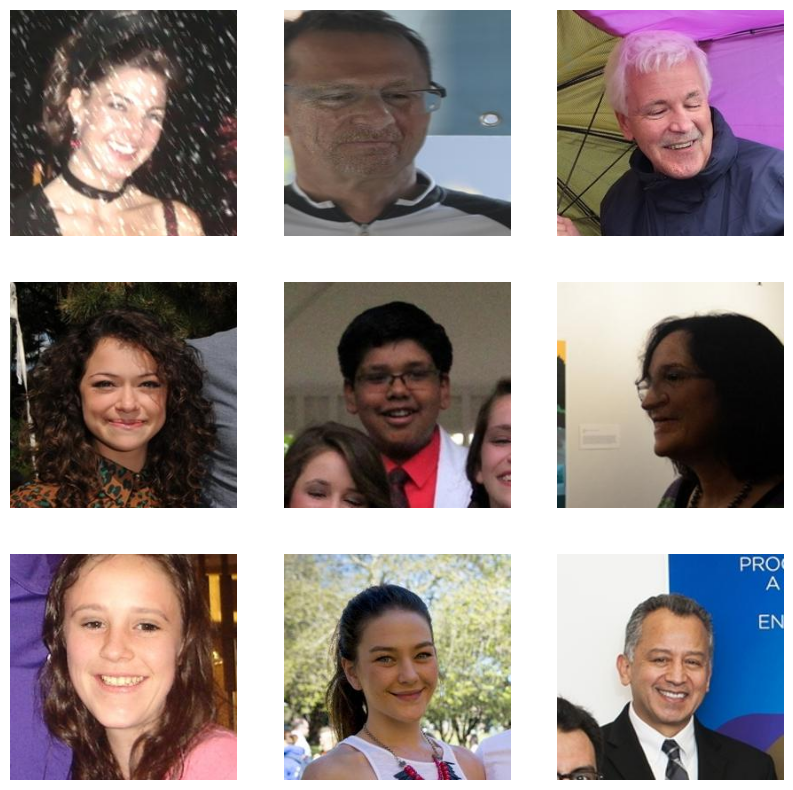

In [2]:
import random
import matplotlib.pyplot as plt

def show_random_images(directory, num_images=9):
    image_files = []

    for root, _, files in os.walk(directory):
        for file in files:
            image_files.append(os.path.join(root, file))

    random_images = random.sample(image_files, min(num_images, len(image_files)))

    plt.figure(figsize=(10, 10))
    for i, image_path in enumerate(random_images):
        img = Image.open(image_path)
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.axis('off')

    plt.show()

show_random_images(directory)


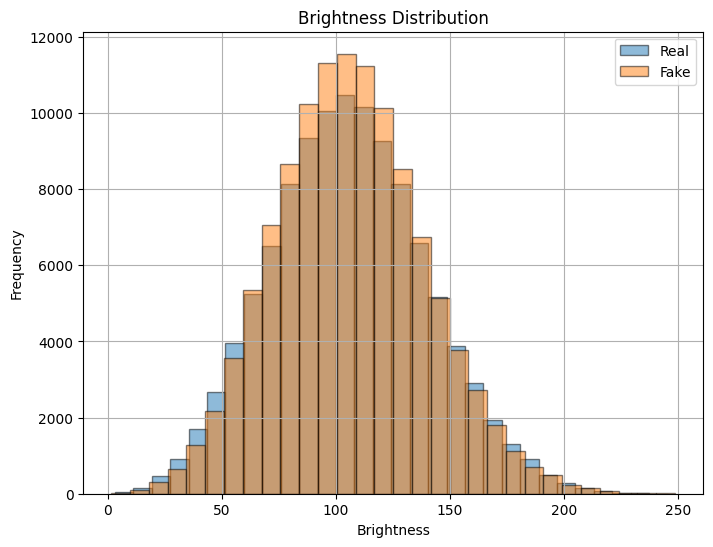

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageStat

def get_brightness(image_path):
    img = Image.open(image_path).convert('L')
    stat = ImageStat.Stat(img)
    return stat.mean[0]

brightness_values = {'real': [], 'fake': []}

for root, _, files in os.walk(directory):
    for file in files:
        file_path = os.path.join(root, file)
        if file.endswith(('jpg', 'jpeg', 'png')):
            brightness = get_brightness(file_path)
            if file.startswith('real_'):
                brightness_values['real'].append(brightness)
            else:
                brightness_values['fake'].append(brightness)

plt.figure(figsize=(8, 6))
plt.hist(brightness_values['real'], alpha=0.5, label='Real', bins=30, edgecolor='black')
plt.hist(brightness_values['fake'], alpha=0.5, label='Fake', bins=30, edgecolor='black')
plt.legend()
plt.grid(True)
plt.title("Brightness Distribution")
plt.xlabel("Brightness")
plt.ylabel("Frequency")
plt.show()


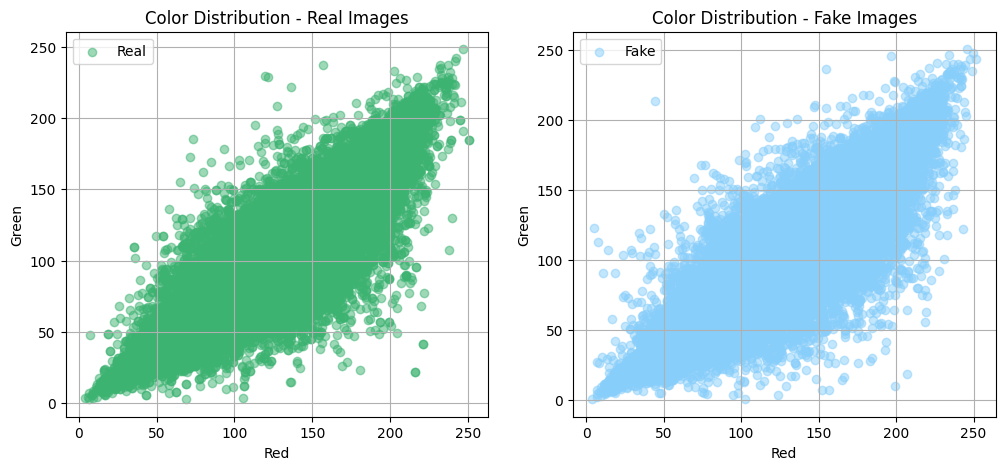

In [7]:
def get_avg_color(image_path):
    img = Image.open(image_path)
    img = img.resize((50, 50))
    img_array = np.array(img)
    return img_array.mean(axis=(0, 1))

real_colors = []
fake_colors = []

for root, _, files in os.walk(directory):
    for file in files:
        file_path = os.path.join(root, file)
        if file.endswith(('jpg', 'jpeg', 'png')):
            avg_color = get_avg_color(file_path)
            if file.startswith('real_'):
                real_colors.append(avg_color)
            else:
                fake_colors.append(avg_color)

real_colors = np.array(real_colors)
fake_colors = np.array(fake_colors)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(real_colors[:, 0], real_colors[:, 1], color='mediumseagreen', alpha=0.5, label='Real')
plt.xlabel("Red")
plt.ylabel("Green")
plt.grid(True)
plt.legend()
plt.title("Color Distribution - Real Images")

plt.subplot(1, 2, 2)
plt.scatter(fake_colors[:, 0], fake_colors[:, 1], color='lightskyblue', alpha=0.5, label='Fake')
plt.xlabel("Red")
plt.ylabel("Green")
plt.grid(True)
plt.legend()
plt.title("Color Distribution - Fake Images")

plt.show()


In [8]:
import kagglehub

import os
from PIL import Image
import shutil

# Download latest version
directory = kagglehub.dataset_download("ciplab/real-and-fake-face-detection")

print("Path to dataset files:", directory)

real = 0
fake = 0
difficulty = {'easy': 0, 'mid': 0, 'hard': 0}
dimension_dict = {}
extensions = set()

for root, dirs, files in os.walk(os.path.join(directory, 'real_and_fake_face')):
    for filename in files:
        extensions.add(filename.split('.')[-1])
        with Image.open(os.path.join(root, filename)) as img:
            width, height = img.size
            if f'{width}x{height}' not in dimension_dict:
                dimension_dict[f'{width}x{height}'] = 1
            else:
                dimension_dict[f'{width}x{height}'] += 1
        if filename.startswith('real_'):
            real += 1
        else:
            fake += 1
            if filename.startswith('easy_'):
                difficulty['easy'] += 1
            elif filename.startswith('mid_'):
                difficulty['mid'] += 1
            elif filename.startswith('hard_'):
                difficulty['hard'] += 1

print(f'# real: {real} || # fake: {fake} -> {difficulty} || {dimension_dict} || {extensions}')

100%|██████████| 431M/431M [00:06<00:00, 69.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ciplab/real-and-fake-face-detection/versions/1
# real: 1081 || # fake: 960 -> {'easy': 240, 'mid': 480, 'hard': 240} || {'600x600': 2041} || {'jpg'}


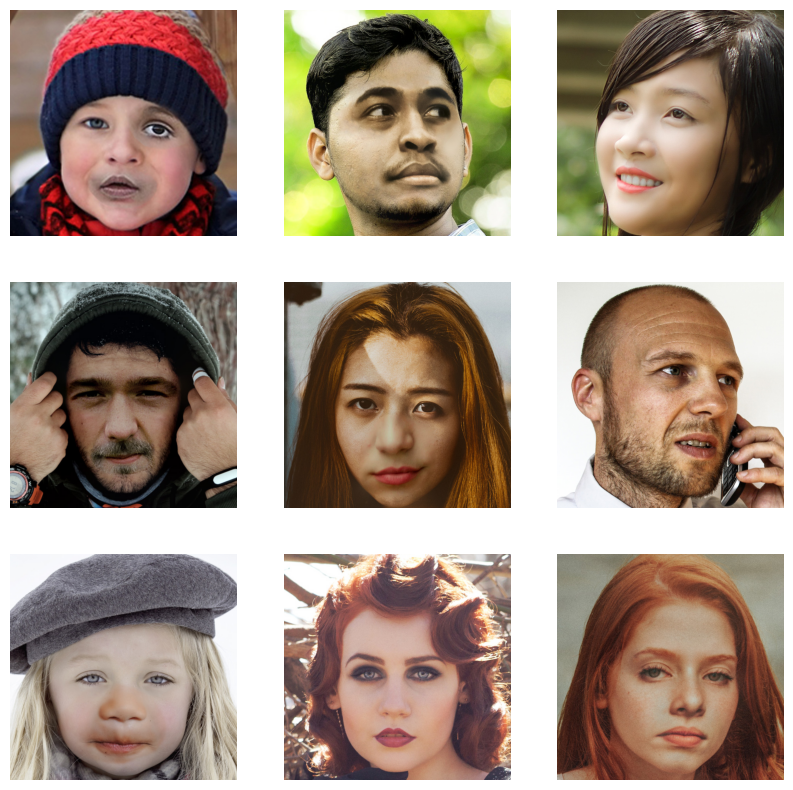

In [9]:
import matplotlib.pyplot as plt
import random

def show_random_images(directory, num_images=9):
    image_files = []

    for root, _, files in os.walk(os.path.join(directory, 'real_and_fake_face')):
        for file in files:
            image_files.append(os.path.join(root, file))

    random_images = random.sample(image_files, min(num_images, len(image_files)))

    plt.figure(figsize=(10, 10))
    for i, image_path in enumerate(random_images):
        img = Image.open(image_path)
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.axis('off')

    plt.show()

show_random_images(directory)


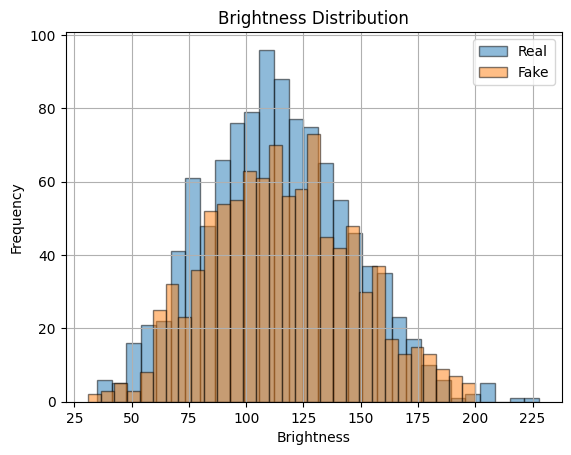

In [10]:
from PIL import ImageStat

def get_brightness(image_path):
    img = Image.open(image_path).convert('L')
    stat = ImageStat.Stat(img)
    return stat.mean[0]

brightness_values = {'real': [], 'fake': []}

for root, _, files in os.walk(os.path.join(directory, 'real_and_fake_face')):
    for file in files:
        file_path = os.path.join(root, file)
        if file.startswith('real_'):
            brightness_values['real'].append(get_brightness(file_path))
        else:
            brightness_values['fake'].append(get_brightness(file_path))

plt.hist(brightness_values['real'], alpha=0.5, label='Real', bins=30, edgecolor='black')
plt.hist(brightness_values['fake'], alpha=0.5, label='Fake', bins=30, edgecolor='black')
plt.legend()
plt.grid(True)
plt.title("Brightness Distribution")
plt.xlabel("Brightness")
plt.ylabel("Frequency")
plt.show()


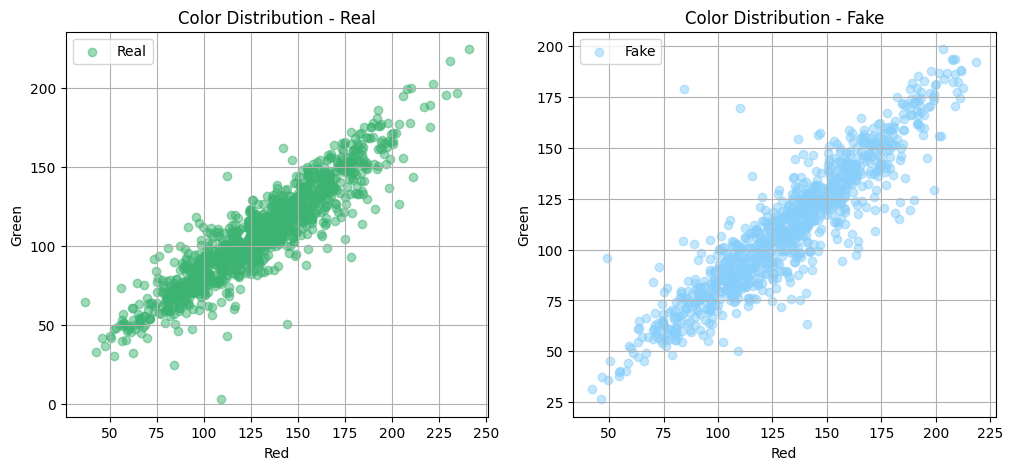

In [11]:
import numpy as np

def get_avg_color(image_path):
    img = Image.open(image_path)
    img = img.resize((50, 50))
    img_array = np.array(img)
    return img_array.mean(axis=(0, 1))

real_colors = []
fake_colors = []

for root, _, files in os.walk(os.path.join(directory, 'real_and_fake_face')):
    for file in files:
        file_path = os.path.join(root, file)
        avg_color = get_avg_color(file_path)
        if file.startswith('real_'):
            real_colors.append(avg_color)
        else:
            fake_colors.append(avg_color)

real_colors = np.array(real_colors)
fake_colors = np.array(fake_colors)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(real_colors[:, 0], real_colors[:, 1], color='mediumseagreen', alpha=0.5, label='Real')
plt.xlabel("Red")
plt.ylabel("Green")
plt.grid(True)
plt.legend()
plt.title("Color Distribution - Real")

plt.subplot(1, 2, 2)
plt.scatter(fake_colors[:, 0], fake_colors[:, 1], color='lightskyblue', alpha=0.5, label='Fake')
plt.xlabel("Red")
plt.ylabel("Green")
plt.grid(True)
plt.legend()
plt.title("Color Distribution - Fake")

plt.show()
